# Hands On with Simple Linear Regression
## Goal for practice
### 1. Performan simple linear regression with SKlearn
### 2. Use model performance KPIs to evaluate model performance
### 3. Perform residule diagnostic and decide proper treatment before fit the model
### 4. Implement SLR with gradient descent algorithm

We have learnt Simple(SLR) Linear Regression, let's use some data to do some hands on work. The data provided is a synthesized data let's fit model with sklearn

#### Load important library

In [1]:
import pandas as pd  
import numpy as np  
import os
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
path="/Users/yibin/Documents/PublicTeaching/CareerOne/IntermediateLevel/DataScienceProgram/Class2/Practice/slr"
data1b = "train.csv"
data1t = "test.csv"
data2b = "train2.csv"
data2t = "test2.csv"
data3b = "train3.csv"
data3t = "test3.csv"
print(os.path.join(path, data1b))

/Users/yibin/Documents/PublicTeaching/CareerOne/IntermediateLevel/DataScienceProgram/Class2/Practice/slr/train.csv


# Read Data

In [3]:
dt1b = pd.read_csv(os.path.join(path, data1b))
dt1t = pd.read_csv(os.path.join(path, data1t))

In [4]:
dt1b.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


Text(0, 0.5, 'y')

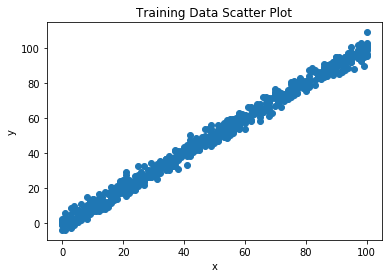

In [5]:
plt.scatter((dt1b['x']),dt1b['y']);
plt.title("Training Data Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")

# Practice 4 - Can you implement simple linear regression model in practice1 from scratch by yourself, using gradient descent?

In [64]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


In [65]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train).reshape(699,1)
y_train = np.array(y_train).reshape(699,1)
x_test = np.array(x_test).reshape(300,1)
y_test = np.array(y_test).reshape(300,1)

### Train steps:
#### 0 - Initiate parameters
#### 1 - Calculate prediction based on temp parameters and equation 
#### 2 - Calc. cost
#### 3 - Calc. Gradient
#### 4 - Update Parameter
#### 5 - loop 1-4 to reach min cost
#### 6 - earlier stop to end loop if minimal alrrady reached

In [66]:
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

def deriv(x_train, y_train, predictions):
    derivatives = dict()
    df = (y_train - predictions) * -1
    db1 = np.mean(np.multiply(x_train, df))
    db0 = np.mean(df)
    derivatives['db1'] = db1
    derivatives['db0'] = db0
    return derivatives

def update_parameters(parameters, derivatives, learning_rate):
    parameters['b1'] = parameters['b1'] - learning_rate * derivatives['db1']
    parameters['b0'] = parameters['b0'] - learning_rate * derivatives['db0']
    return parameters

In [67]:
def train(x_train, y_train, learning_rate, iters = 10):
    #random parameters
    parameters = dict()
    parameters["b1"] = np.random.uniform(0,1) * -1
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #predition
        predictions = get_pred(x_train, parameters)
        
        #cost function
        cost = cost_function(predictions, y_train)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        plt.show()
        
        #gradeint/partial derivatives
        derivatives = deriv(x_train, y_train, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Training

Iteration = 1, Loss = 6637.942803197159


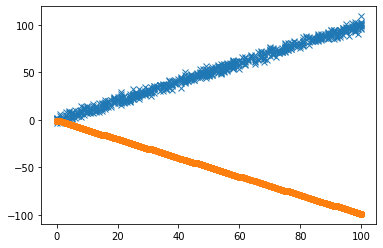

Iteration = 2, Loss = 2947.0960228088843


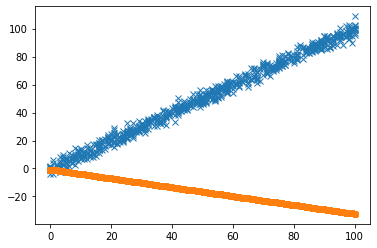

Iteration = 3, Loss = 1309.6778897758143


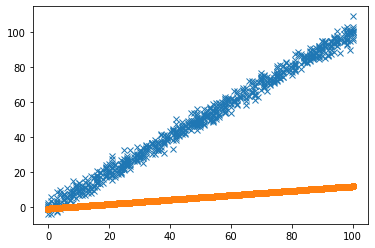

Iteration = 4, Loss = 583.2488871380831


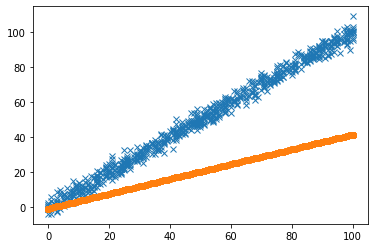

Iteration = 5, Loss = 260.97378425598737


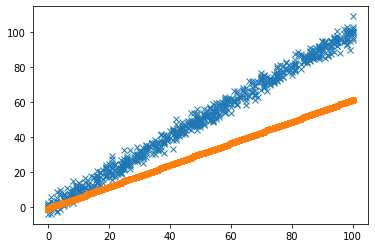

Iteration = 6, Loss = 117.99870728840864


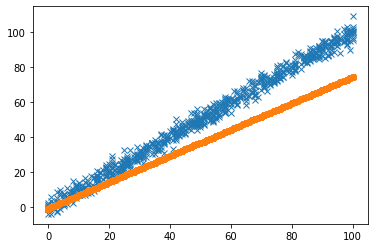

Iteration = 7, Loss = 54.56882167591001


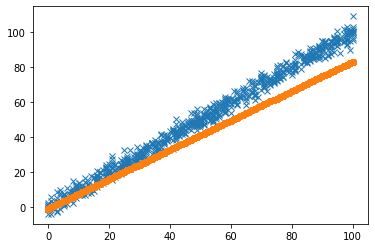

Iteration = 8, Loss = 26.428598936860812


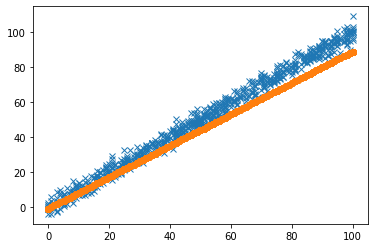

Iteration = 9, Loss = 13.944386127639142


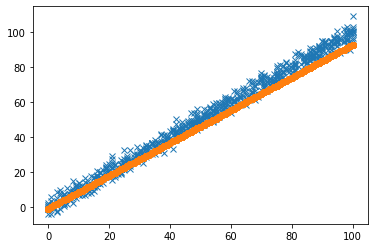

Iteration = 10, Loss = 8.405851654970515


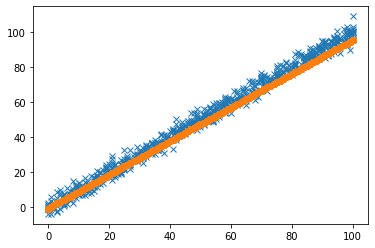

Iteration = 11, Loss = 5.948718367646616


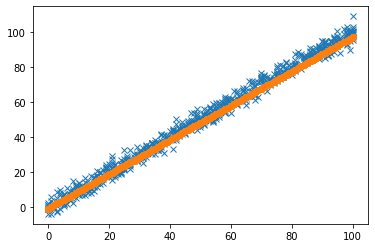

Iteration = 12, Loss = 4.858626973894732


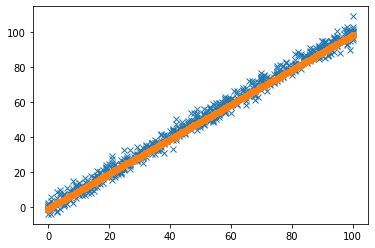

Iteration = 13, Loss = 4.3750140704485805


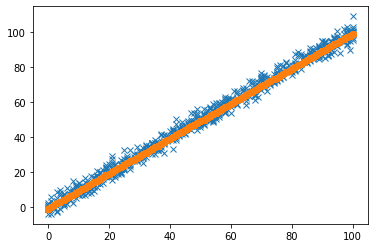

Iteration = 14, Loss = 4.160461069988615


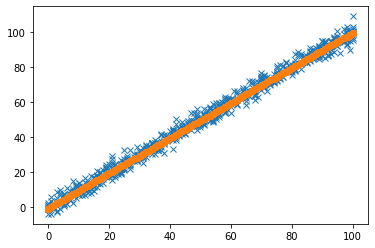

Iteration = 15, Loss = 4.065274597077941


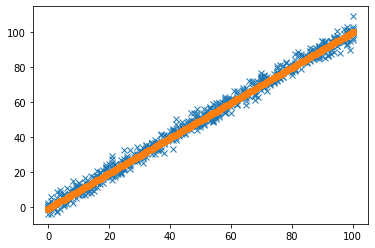

Iteration = 16, Loss = 4.023044241941249


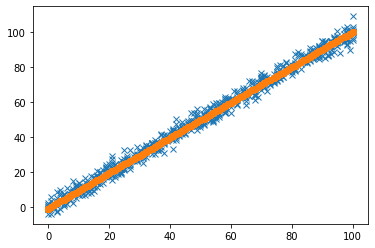

Iteration = 17, Loss = 4.004307494873946


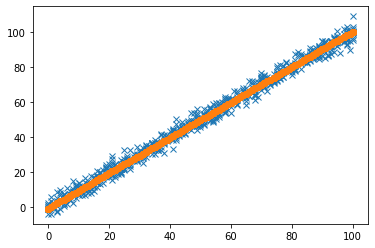

Iteration = 18, Loss = 3.995993521333214


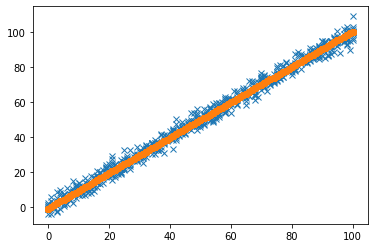

Iteration = 19, Loss = 3.9923035378020066


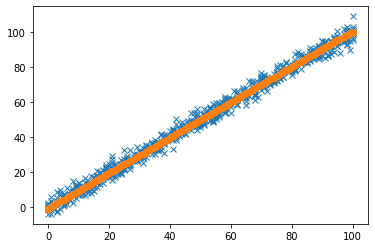

Iteration = 20, Loss = 3.990664954889233


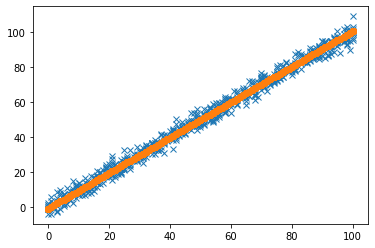

In [68]:
parameters,loss = train(x_train, y_train, 0.0001, 20)

##### More improvement to implement earlier stop

### Final result and validation

In [69]:
print("Fitted Model: Y = {} + {} * X".format(parameters["b0"], parameters["b1"]))

Fitted Model: Y = -0.7724933623232058 + 1.0100338816506569 * X


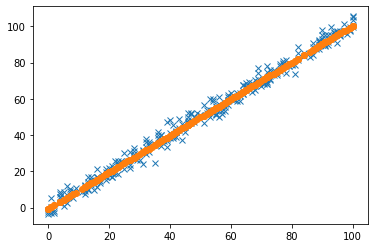

In [70]:
valid_predictions = get_pred(x_test, parameters)
plt.figure()
plt.plot(x_test, y_test, 'x')
plt.plot(x_test, valid_predictions, 'o')
plt.show()

In [71]:
#cost for valid dataset
cost_test = cost_function(valid_predictions, y_test)
print("Loss_test = {}".format(cost_test))
print("Loss_train = {}".format(min(loss)))

Loss_test = 4.729971770163777
Loss_train = 3.990664954889233
